# Time Segmentation

1. Load pickled data
2. Due to some data of parts belong to others, we append all traces into one huge list of data.
3. Segment sensor data into 3 phases: Heating -> Transfer -> Forging
4. Use of digital signal for separation into Heat/Forge phases and anything in between will be Transfer phase.


In [1]:
import pickle as pickle
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import copy as copy

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 120

Load pickled data

In [2]:
pickle_path ="pickles"

In [3]:
sensor_data = pickle.load( open( pickle_path+"/"+"strath_inputs.p", "rb" ) )
cmm_data = pickle.load( open( pickle_path+"/"+"strath_outputs.p", "rb" ) )


In [4]:
#view column names
sensor_data[0].columns

Index(['Timer Tick [ms]', 'Block-Nr', 'Power [kW]', 'Force [kN]', 'A_ges_vibr',
       'Schlagzahl [1/min]', 'EXZ_pos [deg]', 'hydraulic low pressure [bar]',
       'hydraulic high pressure [bar]', 'A_ACTpos [mm]', 'B_ACTpos [mm]',
       'DB_ACTpos [mm]', 'D_ACTpos [mm]', 'L_ACTpos [mm]', 'R_ACTpos [mm]',
       'SBA_ActPos [mm]', 'INDA_ACTpos [deg]', 'A_ACT_Force [kN]',
       'B_ACT_Force [kN]', 'DB_ACT_Force [kN]', 'D_ACT_Force [kN]',
       'L_ACTspd [mm/min]', 'R_ACTspd [mm/min]', 'SBA_NomPos [mm] [mm]',
       'INDA_NOMspd [U/min]', 'A_ACTspd [mm/min]', 'B_ACTspd [mm/min]',
       'DB_ACTspd [mm/min]', 'D_ACTspd [mm/min]', 'L_NOMpos [mm]',
       'R_NOMpos [mm]', 'SBA_OUT [%]', 'INDA_NOMpos [deg]', 'A_NOMpos [mm]',
       'B_NOMpos [mm]', 'DB_NOMpos [mm]', 'D_NOMpos [mm]', 'L_OUT [%]',
       'R_OUT [%]', 'Feedback SBA [%]', 'INDA_OUT [%]', 'A_OUT [%]',
       'B_OUT [%]', 'DB_OUT [%]', 'D_OUT [%]', 'L_NOMspd [mm/min]',
       'R_NOMspd [mm/min]', 'Frc_Volt', 'INDA_ACTspd [U/min

Text(0.5,1,'Force [kN]')

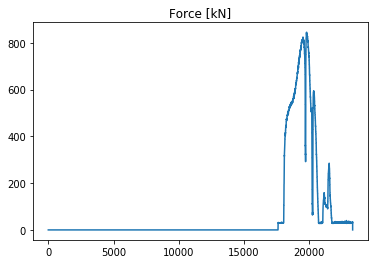

In [5]:
plt.plot(sensor_data[0]['Force [kN]'])
plt.title('Force [kN]')

## Append all data

Append all data into a single list of sensor measurements, each item contains traces of a sensor as numpy arrays (this will take awhile).



In [6]:
appended_sensor_data=[]

if os.path.isfile(pickle_path+"/"+"appended_sensor_data.p") == False:
    for sensor_number in range(sensor_data[0].values.shape[1]):
        each_sensor_data = []
        for part in range(len(sensor_data)):
            part_data = sensor_data[part].values[:,sensor_number].tolist()
            each_sensor_data=each_sensor_data+part_data
        appended_sensor_data= appended_sensor_data + [np.array(each_sensor_data)]
    all_data_temp = {}
    for index,sensor_name in enumerate(sensor_data[0].columns):
         all_data_temp.update({sensor_name:appended_sensor_data[index]})
    appended_sensor_data = pd.DataFrame(all_data_temp)   
    pickle.dump(appended_sensor_data, open( pickle_path+"/appended_sensor_data.p", "wb" ) )
else:
    appended_sensor_data = pickle.load( open( pickle_path+"/appended_sensor_data.p", "rb" ) )


In [7]:
#view data
appended_sensor_data.head()

,Timer Tick [ms],Block-Nr,Power [kW],Force [kN],A_ges_vibr,Schlagzahl [1/min],EXZ_pos [deg],hydraulic low pressure [bar],hydraulic high pressure [bar],A_ACTpos [mm],...,O_MASTOP,c01w,c02w,$U_GH_NOMVAL_1 (U25W1),$H1P_Y12 (U11S17),$H1P_Y11 (U11S7),$U_GH_NOMEXT_2 (U26S1),$U_GH_HEATON_2 (U26S0),$U_GH_NOMEXT_1 (U25S1),$U_GH_HEATON_1 (U25S0).1
0,2.594955e+09,10.0,50.453915,0.0,7.880536,1207.22081,31.204766,115.256693,202.028443,1207.685,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2.594955e+09,10.0,50.454423,0.0,6.334391,1209.64038,103.758477,115.233426,201.954750,1207.685,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2.594955e+09,10.0,50.453662,0.0,5.486467,1205.96980,176.092461,115.138935,201.898792,1207.680,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,2.594955e+09,10.0,50.450142,0.0,114.403358,1210.00307,248.690117,114.985305,201.841733,1207.550,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2.594955e+09,10.0,50.447115,0.0,381.107631,1209.25234,321.024102,114.858741,201.783774,1207.240,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Text(0.5,1,'Force [kN]')

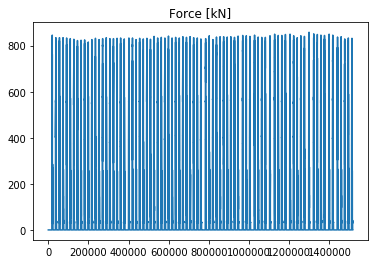

In [8]:
sensor_name = "Force [kN]"
plt.plot(appended_sensor_data[sensor_name])
plt.title(sensor_name)

## Get the segmentation points (start-stop) for each phase

In [9]:
digital_heating_sensor_name = "$U_GH_HEATON_1 (U25S0)"
digital_forging_sensor_name = "Force [kN]"

In [10]:
#use digital signal to trim off
#for heating stage
digital_sensor_heating = appended_sensor_data[digital_heating_sensor_name].values
trigger_val = 0.3
heating_start = np.flatnonzero((digital_sensor_heating[:-1] < trigger_val) & (digital_sensor_heating[1:] > trigger_val))+1
heating_start = heating_start[:-1]
heating_stop = np.flatnonzero((digital_sensor_heating[:-1] > trigger_val) & (digital_sensor_heating[1:] < trigger_val))+1

#use digital signal to trim off
#for forging stage
digital_sensor_forging = appended_sensor_data[digital_forging_sensor_name].values
trigger_val = 0.3
forging_start = np.flatnonzero((digital_sensor_forging[:-1] < trigger_val) & (digital_sensor_forging[1:] > trigger_val))+1
#forging_start = forging_start[:-1]
forging_stop = np.flatnonzero((digital_sensor_forging[:-1] > trigger_val) & (digital_sensor_forging[1:] < trigger_val))+1



In [11]:
#now get the segmentation points into a dataframe
segmentation_points = pd.DataFrame({"heating_start":heating_start,"heating_stop":heating_stop,"forging_start":forging_start,"forging_stop":forging_stop})


In [12]:
#there should be a heating & forging start-stop for each part
print(len(heating_start),len(heating_stop),len(forging_start),len(forging_stop))

81 81 81 81


## Plot heating segments

Pick a sensor for verifying by comparing it with the digital signal, vertical line shows the segmentation.

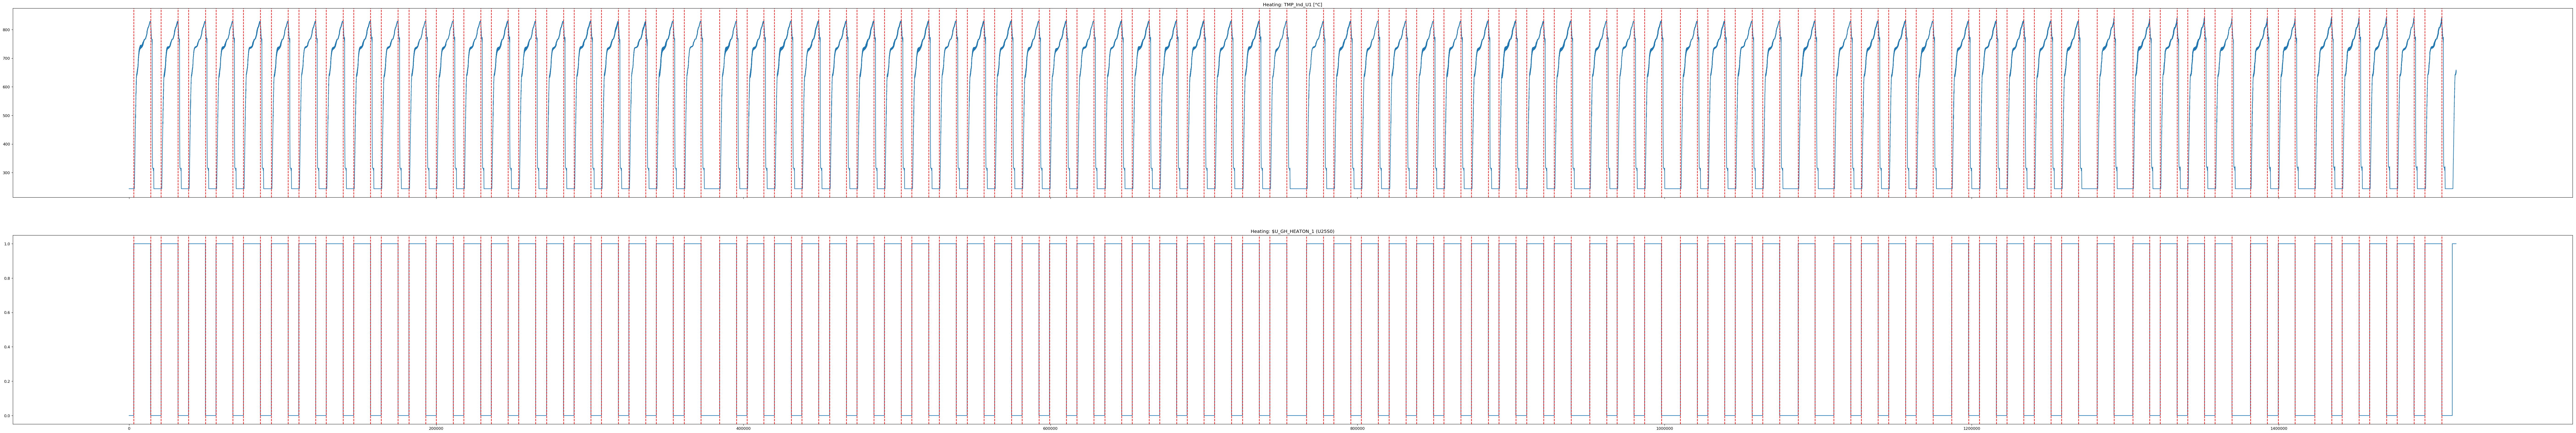

In [13]:
#start plotting heating processes
fig, (ax1, ax2) = plt.subplots(2,1, dpi = 120, figsize=(120,20),sharex=True)

#heating plots
verify_heating_sensor_name = "TMP_Ind_U1 [°C]"
ax1.plot(appended_sensor_data[verify_heating_sensor_name])
ax2.plot(appended_sensor_data[digital_heating_sensor_name])

#set title
ax1.set_title("Heating: "+ verify_heating_sensor_name)
ax2.set_title("Heating: "+ digital_heating_sensor_name)

for index, row in segmentation_points.iterrows():
    ax1.axvline(x=row["heating_start"], color='r', linestyle='--')
    ax1.axvline(x=row["heating_stop"], color='r', linestyle='--')
    ax2.axvline(x=row["heating_start"], color='r', linestyle='--')
    ax2.axvline(x=row["heating_stop"], color='r', linestyle='--')



## Plot forging segments

We do the same to forging process segmentation. 

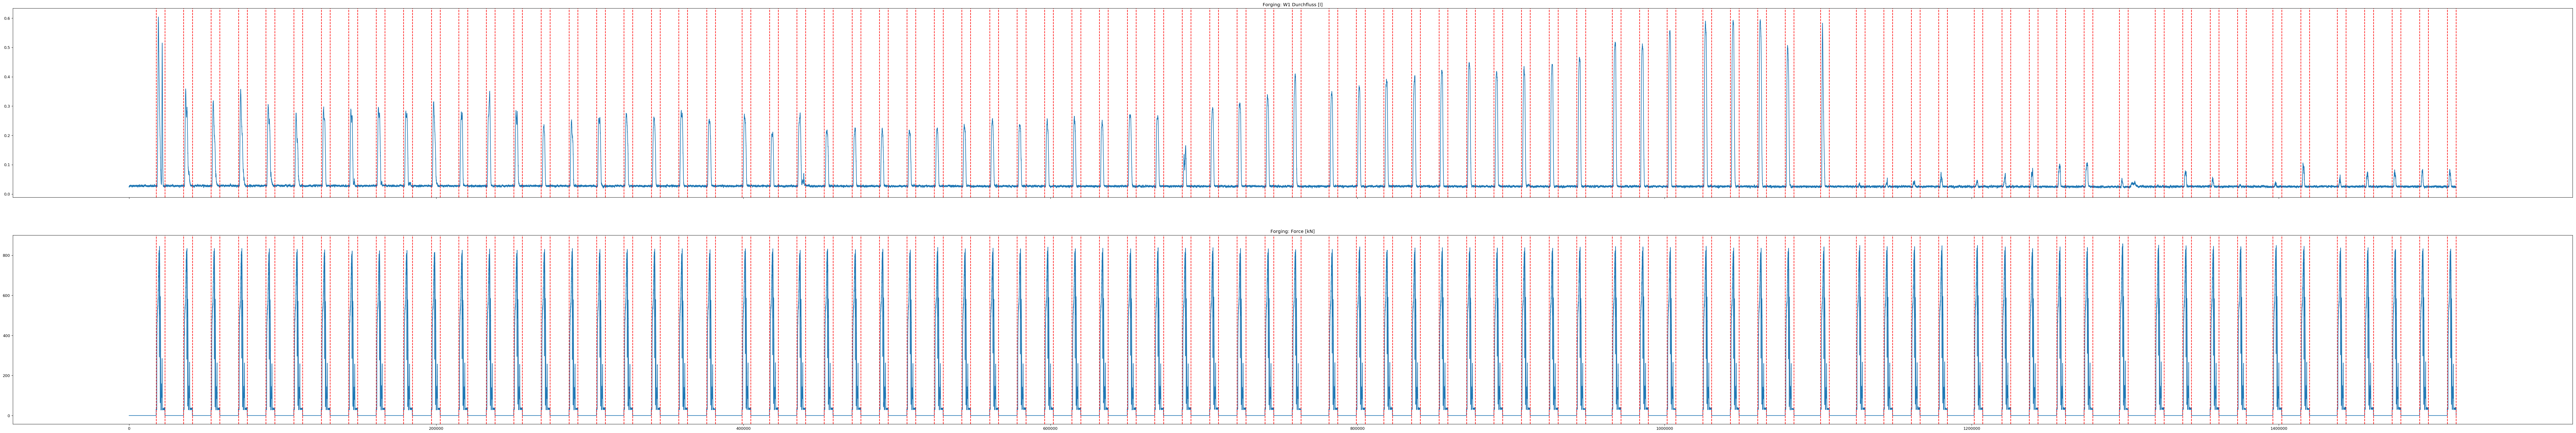

In [14]:
#start plotting forging processes
fig, (ax1, ax2) = plt.subplots(2,1, dpi = 120, figsize=(120,20),sharex=True)

#heating plots
verify_forging_sensor_name = "W1 Durchfluss [l]"
ax1.plot(appended_sensor_data[verify_forging_sensor_name])
ax2.plot(appended_sensor_data[digital_forging_sensor_name])

#set title
ax1.set_title("Forging: "+ verify_forging_sensor_name)
ax2.set_title("Forging: "+ digital_forging_sensor_name)

for index, row in segmentation_points.iterrows():    
    #draw vertical line
    ax1.axvline(x=row["forging_start"], color='r', linestyle='--')
    ax1.axvline(x=row["forging_stop"], color='r', linestyle='--')
    ax2.axvline(x=row["forging_start"], color='r', linestyle='--')
    ax2.axvline(x=row["forging_stop"], color='r', linestyle='--')
    

## Segmenting into 3 phases (Heat-Transfer-Forge)

1. Slice into 3 lists , one for each phase
2. Each list has data for 99 sensors 
3. Select some sensors from each list based on physical relevance (Thanks to Yuhui Luo for the lists of sensors)

In [15]:
data_heating_phase = []
data_transfer_phase = []
data_forging_phase = []
data_full_phase = []

for part_index, part_row in segmentation_points.iterrows(): 
    #slice into segments
    heat_temp_dt=copy.copy(appended_sensor_data.loc[part_row["heating_start"]:part_row["heating_stop"]])
    transfer_temp_dt=copy.copy(appended_sensor_data.loc[part_row["heating_stop"]:part_row["forging_start"]])    
    forge_temp_dt=copy.copy(appended_sensor_data.loc[part_row["forging_start"]:part_row["forging_stop"]])
    full_temp_dt=copy.copy(appended_sensor_data.loc[part_row["heating_start"]:part_row["forging_stop"]])
    
    #drop index column
    heat_temp_dt=heat_temp_dt.reset_index(drop=True)
    transfer_temp_dt=transfer_temp_dt.reset_index(drop=True)
    forge_temp_dt=forge_temp_dt.reset_index(drop=True)
    full_temp_dt=forge_temp_dt.reset_index(drop=True)
    
    #append into list
    data_heating_phase.append(heat_temp_dt)
    data_transfer_phase.append(transfer_temp_dt)
    data_forging_phase.append(forge_temp_dt)
    data_full_phase.append(forge_temp_dt)
  

In [16]:
#format : list of dataframe for each part
print(data_heating_phase[2].head())
print(data_transfer_phase[2].head())
print(data_forging_phase[2].head())

   Timer Tick [ms]  Block-Nr  Power [kW]  Force [kN]  A_ges_vibr  \
0     2.595342e+09     100.0   49.074017   30.447656  174.221459   
1     2.595342e+09     100.0   49.068901   30.447656  128.426825   
2     2.595342e+09     100.0   49.058746   30.447656  140.350008   
3     2.595342e+09     100.0   49.045457   30.447656  141.634362   
4     2.595342e+09     100.0   49.030631   30.447656   88.533973   

   Schlagzahl [1/min]  EXZ_pos [deg]  hydraulic low pressure [bar]  \
0          1206.09053      55.945977                    111.451791   
1          1207.21548     128.675469                    111.426506   
2          1205.50862     200.745781                    111.469996   
3          1205.85897     273.255547                    111.476091   
4          1209.08064     345.765312                    111.451591   

   hydraulic high pressure [bar]  A_ACTpos [mm]            ...             \
0                     204.716233        336.700            ...              
1               

## List of sensors for each phase

In [19]:
heating_sensor_names = ['RamRetract_ActSpd [rpm]', 'TMP_Ind_U1 [°C]', 'IP_Out [%]', 'L1.R_B41 [bar]']
forging_sensor_names=[
'Power [kW]',
'Force [kN]',
'A_ges_vibr',
'Schlagzahl [1/min]',
'EXZ_pos [deg]',
'hydraulic low pressure [bar]',
'hydraulic high pressure [bar]',
'A_ACTpos [mm]',
'B_ACTpos [mm]',
'DB_ACTpos [mm]',
'D_ACTpos [mm]',
'L_ACTpos [mm]',
'R_ACTpos [mm]',
'SBA_ActPos [mm]',
'INDA_ACTpos [deg]',
'A_ACT_Force [kN]',
'B_ACT_Force [kN]',
'DB_ACT_Force [kN]',
'D_ACT_Force [kN]',
'L_ACTspd [mm/min]',
'R_ACTspd [mm/min]',
'SBA_NomPos [mm] [mm]',
'INDA_NOMspd [U/min]',
'A_ACTspd [mm/min]',
'B_ACTspd [mm/min]',
'DB_ACTspd [mm/min]',
'D_ACTspd [mm/min]',
'L_NOMpos [mm]',
'R_NOMpos [mm]',
'SBA_OUT [%]',
'INDA_NOMpos [deg]',
'A_NOMpos [mm]',
'B_NOMpos [mm]',
'DB_NOMpos [mm]',
'D_NOMpos [mm]',
'L_OUT [%]',
'R_OUT [%]',
'Feedback SBA [%]',
'INDA_OUT [%]',
'A_OUT [%]',
'B_OUT [%]',
'DB_OUT [%]',
'D_OUT [%]',
'L_NOMspd [mm/min]',
'R_NOMspd [mm/min]',
'Frc_Volt',
'INDA_ACTspd [U/min]',
'A_NOMspd [mm/min]',
'B_NOMspd [mm/min]',
'DB_NOMspd [mm/min]',
'D_NOMspd [mm/min]',
'Feedback L [%]',
'Feedback R [%]',
'Speed Vn_1 [rpm]',
'NOMforceSPA [kN]',
'DB_NOM_Force [kN]',
'SPA_OUT [%]',
'Feedback A [%]',
'Feedback B [%]',
'Feedback DB [%]',
'Feedback D [%]',
'Feedback_SPA [%]',
'Lub_ActSpd [rpm]',
'RamRetract_ActSpd [rpm]',
'Hyd_ActSpd [rpm]',
'ForgingBox_Temp',
'TMP_Ind_F [°C]',
'ACTforceSPA [kN]',
'W2 Durchfluss [l]',
'W1 Durchfluss [l]',
'$B12R_Y11 (U14S16)',
'L1.R_B41 [bar]',
'c01w',
'c02w']

Select the sensors for phases

In [20]:
data_heating_phase_filtered = copy.copy(data_heating_phase)
data_forging_phase_filtered = copy.copy(data_forging_phase)
for part_index in range(len(data_heating_phase_filtered)):
    data_heating_phase_filtered[part_index]= data_heating_phase[part_index][heating_sensor_names]
    data_forging_phase_filtered[part_index]= data_forging_phase_filtered[part_index][forging_sensor_names]
                     

Save into a dictionary which contains all phases, parts, sensors

In [22]:
segmented_data = {"heating":data_heating_phase_filtered,
                  "transfer":data_transfer_phase,
                  "forging":data_forging_phase_filtered,
                  "full":data_full_phase}

In [23]:
segmented_data['heating'][0].head()

,RamRetract_ActSpd [rpm],TMP_Ind_U1 [°C],IP_Out [%],L1.R_B41 [bar]
0,614.4,243.847656,-0.019531,34.663463
1,611.4,243.847656,-0.029297,34.407160
2,611.4,243.847656,-0.029297,34.656913
3,606.6,243.847656,-0.029297,34.957983
4,599.4,243.847656,-0.039062,35.035041


In [24]:
print(len(segmented_data['heating']))

81


Pickle the segmented data for future use

In [25]:
pickle_path = "pickles"
segmented_file_name = "segmented_inputs.p"

if pickle_path not in os.listdir():
    os.mkdir(pickle_path)

#save into pickle file
pickle.dump(segmented_data, open( pickle_path+"/"+segmented_file_name, "wb" ) )

## Optional: Plot and save figure to check 

In [17]:
#get the paths for saving figures ready
plot_path = "plots"
heating_figure_path = "heating"
transfer_figure_path = "transfer"
forging_figure_path = "forging"

if(plot_path not in os.listdir()):
    os.mkdir(plot_path)
if(heating_figure_path not in os.listdir(plot_path)):  
    os.mkdir(plot_path+"/"+heating_figure_path)
if(transfer_figure_path not in os.listdir(plot_path)):  
    os.mkdir(plot_path+"/"+transfer_figure_path)
if(forging_figure_path not in os.listdir(plot_path)):  
    os.mkdir(plot_path+"/"+forging_figure_path)

In [ ]:
for sensor_id,sensor_name in enumerate(heating_sensor_names):
    for part_index in range(len(data_heating_phase)):
        plt.plot(data_heating_phase[part_index][sensor_name])
    plt.title(sensor_name)        
    plt.savefig(plot_path+"/"+heating_figure_path+"/"+str(sensor_id)+".png")    
    plt.clf()

In [ ]:
for sensor_id,sensor_name in enumerate(forging_sensor_names):
    for part_index in range(len(data_forging_phase)):
        plt.plot(data_forging_phase[part_index][sensor_name])
    plt.title(sensor_name)        
    plt.savefig(plot_path+"/"+forging_figure_path+"/"+str(sensor_id)+".png")    
    plt.clf()